<a href="https://colab.research.google.com/github/AMEERKOTTA/Deep-Learning-and-Artificial-Intelligence-Tensorflow-2.0/blob/main/Chapter%2004%20%3A%20Convolutional%20Neural%20Networks/06_improvement_on_cifar10_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPROVEMENT ON CIFAR 10 CNN MODEL**

IMPORT LIBRARIES

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

LOAD THE DATA

In [6]:
cifar10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
## standardize the training and testing data.
train_images, test_images = train_images / 255, test_images / 255
## flatten the training labels and testing labels.
train_labels, test_labels = train_labels.flatten(), test_labels.flatten()

print("Training Images Shape :--", train_images.shape)
print("Training Labels Shape :--", train_labels.shape)
print("Testing Images Shape :--", test_images.shape)
print("Testing Labels Shape :--", test_labels.shape)

Training Images Shape :-- (50000, 32, 32, 3)
Training Labels Shape :-- (50000,)
Testing Images Shape :-- (10000, 32, 32, 3)
Testing Labels Shape :-- (10000,)


CHECK FOR THE NUMBER OF CLASSES

In [7]:
k = len(set(train_labels))
print("Number of Classes :--", k)

Number of Classes :-- 10


BUILD THE MODEL

In [9]:
from keras.api._v2.keras import activations
## using the functional API
i = Input(shape = train_images[0].shape) 
# x = Conv2D(32, (3,3), strides = 2, activation = "relu")(i)
# x = Conv2D(64, (3,3), strides = 2, activation = "relu")(x)
# x = Conv2D(128, (3,3), strides = 2, activation = "relu")(x)
x = Conv2D(32, (3,3), activation = "relu", padding = "same")(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation = "relu", padding = "same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2,2)(x)
# x = Dropout(0.2)(x)

x = Conv2D(64, (3,3), activation = "relu", padding = "same")(i)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation = "relu", padding = "same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2,2)(x)
# x = Dropout(0.2)(x)

x = Conv2D(128, (3,3), activation = "relu", padding = "same")(i)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation = "relu", padding = "same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2,2)(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation = "relu")(x)
x = Dropout(0.2)(x)
x = Dense(k, activation = "softmax")(x)

model = Model(i, x)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 batch_normalization_10 (Bat  (None, 32, 32, 128)      512       
 chNormalization)                                                
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 128)       147584    
                                                                 
 batch_normalization_11 (Bat  (None, 32, 32, 128)      512       
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 128)      0   

COMPILE THE MODEL

In [10]:
## compile the model
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

TRAIN THE MODEL

In [11]:
## fit the model
r = model.fit(train_images, train_labels,
              validation_data = (test_images, test_labels),
              epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 37s 17ms/step - loss: 1.8984 - accuracy: 0.4148 - val_loss: 1.3014 - val_accuracy: 0.5355
Epoch 2/50
1563/1563 [==============================] - 25s 16ms/step - loss: 1.2846 - accuracy: 0.5386 - val_loss: 1.3280 - val_accuracy: 0.5246
Epoch 3/50
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1330 - accuracy: 0.5967 - val_loss: 1.1593 - val_accuracy: 0.5943
Epoch 4/50
1563/1563 [==============================] - 25s 16ms/step - loss: 1.0256 - accuracy: 0.6346 - val_loss: 1.1149 - val_accuracy: 0.6265
Epoch 5/50
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9222 - accuracy: 0.6703 - val_loss: 1.0723 - val_accuracy: 0.6315
Epoch 6/50
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8365 - accuracy: 0.7045 - val_loss: 1.0146 - val_accuracy: 0.6584
Epoch 7/50
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7745 - accuracy: 0.7276 - val_loss: 1.0720 -

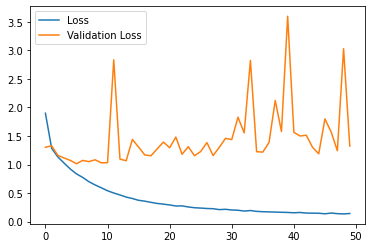

In [12]:
## plotting the loss and accuracy graphs
plt.plot(r.history["loss"], label = "Loss")
plt.plot(r.history["val_loss"], label = "Validation Loss")
plt.legend();

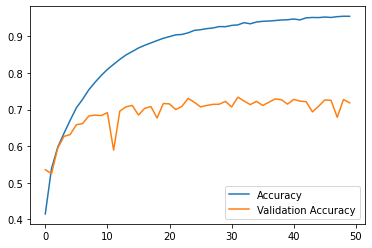

In [13]:
plt.plot(r.history["accuracy"], label = "Accuracy")
plt.plot(r.history["val_accuracy"], label = "Validation Accuracy")
plt.legend();

IMAGE AUGMENTATION PROCESS

In [14]:
## initialize the batch size
batch_size = 32
## define the data generator using keras ImageDataGenerator()
## add the width shifting, height shifting and horizontal flipping on the images.
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True
)
## now generate the data for training using the above augmentation methods.
train_generator = data_generator.flow(
    train_images, train_labels, batch_size
)

## initiate the steps_per_epoch
steps_per_epoch = train_images.shape[0] // batch_size

TRAIN THE MODEL USING NEW DATA AFTER AUGMENTATION

In [16]:
## fit the model
r = model.fit_generator(
    train_generator,
    validation_data = (test_images, test_labels),
    steps_per_epoch = steps_per_epoch,
    epochs = 50
)

Epoch 1/50


<ipython-input-16-eebccdad0ff5>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


1562/1562 [==============================] - 37s 24ms/step - loss: 1.1357 - accuracy: 0.6308 - val_loss: 0.9298 - val_accuracy: 0.7219
Epoch 2/50
1562/1562 [==============================] - 37s 24ms/step - loss: 0.9368 - accuracy: 0.6865 - val_loss: 0.8945 - val_accuracy: 0.7163
Epoch 3/50
1562/1562 [==============================] - 36s 23ms/step - loss: 0.8874 - accuracy: 0.7006 - val_loss: 2.9837 - val_accuracy: 0.6629
Epoch 4/50
1562/1562 [==============================] - 37s 24ms/step - loss: 0.8564 - accuracy: 0.7108 - val_loss: 0.8094 - val_accuracy: 0.7397
Epoch 5/50
1562/1562 [==============================] - 37s 23ms/step - loss: 0.8316 - accuracy: 0.7184 - val_loss: 0.8262 - val_accuracy: 0.7375
Epoch 6/50
1562/1562 [==============================] - 37s 24ms/step - loss: 0.8079 - accuracy: 0.7287 - val_loss: 0.7728 - val_accuracy: 0.7391
Epoch 7/50
1562/1562 [==============================] - 37s 23ms/step - loss: 0.7927 - accuracy: 0.7319 - val_loss: 0.8237 - val_accura

PLOT THE ACCURACY AND LOSSES

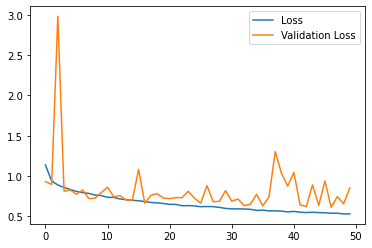

In [17]:
## plotting the loss and accuracy graphs
plt.plot(r.history["loss"], label = "Loss")
plt.plot(r.history["val_loss"], label = "Validation Loss")
plt.legend();

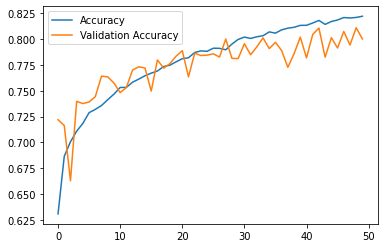

In [18]:
plt.plot(r.history["accuracy"], label = "Accuracy")
plt.plot(r.history["val_accuracy"], label = "Validation Accuracy")
plt.legend();

Now we have a Generalized model than Earlier.
+ Here Accuracy and validation Accuracy are almost same.
+ So there is no Overfitting.


***